In [1]:
import mysql.connector
from mysql.connector import errorcode
import config
import pandas as pd
import nba_api.stats.endpoints as nba
import time

In [64]:
dbname = 'nba'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    db = dbname
)
cursor = cnx.cursor(buffered = True)

In [3]:
select_statement = """SELECT GAME_ID, GAME_DATE FROM nba.game_logs WHERE SEASON_ID = '22019';"""
cursor.execute(select_statement)
game_ids = cursor.fetchall()

In [4]:
# Get the set of all the game_ids
game_ids = set(game_ids)
game_ids_df = pd.DataFrame(game_ids)
game_ids_df.columns = ['GAME_ID', 'DATE']

# Sort by GAME_ID and reset index
game_ids_df.sort_values(by = 'GAME_ID', inplace = True)
game_ids_df.reset_index(drop = True, inplace = True)

In [5]:
def get_box_score(game_id):
    try:
        box_score = nba.BoxScoreTraditionalV2(game_id=game_id).get_data_frames()[0]
        box_score['pk'] = str(box_score['PLAYER_ID']) + box_score['GAME_ID']
        print(box_score.head())
        return box_score
    except:
        return 'Error'

In [6]:
player_stats = []
for game in game_ids_df['GAME_ID']:
    player_stats.append(get_box_score(game))

      GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  0021900001  1610612740               NOP  New Orleans     201950   
1  0021900001  1610612740               NOP  New Orleans    1627742   
2  0021900001  1610612740               NOP  New Orleans     202324   
3  0021900001  1610612740               NOP  New Orleans     200755   
4  0021900001  1610612740               NOP  New Orleans    1628366   

      PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0    Jrue Holiday              F          41:05  6.0  ...   2.0  4.0  6.0   
1  Brandon Ingram              F          35:06  8.0  ...   5.0  5.0  5.0   
2  Derrick Favors              C          20:45  3.0  ...   6.0  7.0  2.0   
3       JJ Redick              G          27:02  6.0  ...   2.0  2.0  1.0   
4      Lonzo Ball              G          24:50  2.0  ...   5.0  5.0  5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  2.0  5.0  2.0  13.0       -14.0   
1  1.0  2.0  2.0  4.0  2

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900007  1610612763               MEM   Memphis     203109   
1  0021900007  1610612763               MEM   Memphis    1628991   
2  0021900007  1610612763               MEM   Memphis     202685   
3  0021900007  1610612763               MEM   Memphis    1628415   
4  0021900007  1610612763               MEM   Memphis    1629630   

         PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0        Jae Crowder              F          30:17  3.0  ...   3.0  5.0  2.0   
1  Jaren Jackson Jr.              F          29:56  5.0  ...   2.0  3.0  0.0   
2  Jonas Valanciunas              C          16:09  3.0  ...   1.0  1.0  1.0   
3      Dillon Brooks              G          18:10  3.0  ...   5.0  5.0  1.0   
4          Ja Morant              G          25:09  6.0  ...   4.0  4.0  4.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  1.0  1.0  13.0        -9.0   
1  1.0  2.0  3.0  5.0  1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900013  1610612743               DEN    Denver     203115   
1  0021900013  1610612743               DEN    Denver     200794   
2  0021900013  1610612743               DEN    Denver     203999   
3  0021900013  1610612743               DEN    Denver     203914   
4  0021900013  1610612743               DEN    Denver    1627750   

    PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  STL  \
0   Will Barton              F          31:27  3.0  ...   4.0   5.0  2.0  2.0   
1  Paul Millsap              F          31:46  3.0  ...   5.0   5.0  2.0  3.0   
2  Nikola Jokic              C          23:54  8.0  ...   9.0  13.0  2.0  0.0   
3   Gary Harris              G          35:14  3.0  ...   3.0   3.0  0.0  2.0   
4  Jamal Murray              G          33:47  4.0  ...   4.0   5.0  6.0  1.0   

   BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  1.0  1.0  19.0         2.0   
1  2.0  2.0  3.0  11.0      

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900019  1610612752               NYK  New York     203944   
1  0021900019  1610612752               NYK  New York     202694   
2  0021900019  1610612752               NYK  New York    1629011   
3  0021900019  1610612752               NYK  New York    1629628   
4  0021900019  1610612752               NYK  New York     203901   

         PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0      Julius Randle              F          38:34  5.0  ...   8.0  11.0  4.0   
1  Marcus Morris Sr.              F          33:19  3.0  ...   1.0   2.0  0.0   
2  Mitchell Robinson              C          16:35  3.0  ...   5.0   7.0  1.0   
3         RJ Barrett              G          35:40  7.0  ...   3.0   3.0  3.0   
4      Elfrid Payton              G          24:07  4.0  ...   2.0   4.0  2.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  6.0  5.0  14.0        -2.0   
1  0.0  1.0  1.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900025  1610612762               UTA      Utah     204060   
1  0021900025  1610612762               UTA      Utah     201145   
2  0021900025  1610612762               UTA      Utah     203497   
3  0021900025  1610612762               UTA      Utah    1628378   
4  0021900025  1610612762               UTA      Utah     201144   

        PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0        Joe Ingles              F          28:22    1  ...     3    3    4   
1        Jeff Green              F          23:23    2  ...     3    3    1   
2       Rudy Gobert              C          32:24    4  ...     9    9    3   
3  Donovan Mitchell              G          33:58    7  ...     5    5    3   
4       Mike Conley              G          31:15    3  ...     3    4    3   

   STL  BLK  TO  PF  PTS  PLUS_MINUS  \
0    0    0   2   3    2        -9.0   
1    1    0   3   3    5         2.0

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900031  1610612761               TOR   Toronto    1628384   
1  0021900031  1610612761               TOR   Toronto    1627783   
2  0021900031  1610612761               TOR   Toronto     201188   
3  0021900031  1610612761               TOR   Toronto     200768   
4  0021900031  1610612761               TOR   Toronto    1627832   

     PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  STL  \
0     OG Anunoby              F          25:32    7  ...     4    6    2    1   
1  Pascal Siakam              F          28:05    7  ...     5    6    4    1   
2     Marc Gasol              C          23:10    1  ...     8   10    2    0   
3     Kyle Lowry              G          34:25    4  ...     7    7    8    1   
4  Fred VanVleet              G          30:35    5  ...     4    4    6    1   

   BLK  TO  PF  PTS  PLUS_MINUS  \
0    4   1   1   17        25.0   
1    0   4   5   19        22.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900037  1610612751               BKN  Brooklyn     203925   
1  0021900037  1610612751               BKN  Brooklyn    1627752   
2  0021900037  1610612751               BKN  Brooklyn     201599   
3  0021900037  1610612751               BKN  Brooklyn    1627747   
4  0021900037  1610612751               BKN  Brooklyn     202681   

      PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  AST  \
0      Joe Harris              F          36:55   5.0  ...   1.0   2.0  2.0   
1  Taurean Prince              F          30:27   4.0  ...   5.0   6.0  2.0   
2  DeAndre Jordan              C          23:26   3.0  ...  11.0  12.0  1.0   
3    Caris LeVert              G          38:57  11.0  ...   4.0   4.0  5.0   
4    Kyrie Irving              G          34:20  11.0  ...   6.0   7.0  7.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  2.0  3.0  13.0         3.0   
1  0.0  0.0  4.0  3.0  12.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
0  0021900043  1610612755               PHI  Philadelphia     202699   
1  0021900043  1610612755               PHI  Philadelphia     201143   
2  0021900043  1610612755               PHI  Philadelphia     203954   
3  0021900043  1610612755               PHI  Philadelphia    1626196   
4  0021900043  1610612755               PHI  Philadelphia    1627732   

       PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  AST  \
0    Tobias Harris              F          38:51   5.0  ...   5.0   5.0  5.0   
1       Al Horford              F          32:01   1.0  ...   5.0   9.0  2.0   
2      Joel Embiid              C          32:43  12.0  ...  10.0  13.0  5.0   
3  Josh Richardson              G          30:49   6.0  ...   4.0   5.0  3.0   
4      Ben Simmons              G          37:49   6.0  ...   5.0   6.0  6.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  1.0  1.0  13.0        -6.0   


      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900049  1610612762               UTA      Utah     202711   
1  0021900049  1610612762               UTA      Utah    1626220   
2  0021900049  1610612762               UTA      Utah     203497   
3  0021900049  1610612762               UTA      Utah    1628378   
4  0021900049  1610612762               UTA      Utah     201144   

        PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0  Bojan Bogdanovic              F          37:19  8.0  ...   4.0   5.0  2.0   
1     Royce O'Neale              F          31:44  3.0  ...   4.0   4.0  4.0   
2       Rudy Gobert              C          35:32  2.0  ...  16.0  18.0  1.0   
3  Donovan Mitchell              G          37:06  9.0  ...   1.0   2.0  3.0   
4       Mike Conley              G          20:10  0.0  ...   2.0   2.0  1.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  2.0  1.0  5.0  3.0  29.0         3.0   
1  0.0  2.0  0.0  1.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900055  1610612741               CHI   Chicago     203490   
1  0021900055  1610612741               CHI   Chicago    1628374   
2  0021900055  1610612741               CHI   Chicago    1628976   
3  0021900055  1610612741               CHI   Chicago     203897   
4  0021900055  1610612741               CHI   Chicago     203107   

          PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0     Otto Porter Jr.              F          27:29  5.0  ...   3.0  5.0  3.0   
1     Lauri Markkanen              F          27:27  4.0  ...   7.0  8.0  3.0   
2  Wendell Carter Jr.              C          27:10  5.0  ...   6.0  8.0  0.0   
3         Zach LaVine              G          31:54  6.0  ...   0.0  0.0  2.0   
4    Tomas Satoransky              G          27:15  2.0  ...   2.0  2.0  8.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  0.0  2.0  15.0         5.0   
1  0.0  1.0  0.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900061  1610612745               HOU   Houston    1627863   
1  0021900061  1610612745               HOU   Houston     200782   
2  0021900061  1610612745               HOU   Houston     203991   
3  0021900061  1610612745               HOU   Houston     201935   
4  0021900061  1610612745               HOU   Houston     201566   

         PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  \
0   Danuel House Jr.              F          28:38   5.0  ...   4.0   7.0   
1        P.J. Tucker              F          33:11   3.0  ...   3.0   5.0   
2       Clint Capela              C          29:46   9.0  ...   7.0  12.0   
3       James Harden              G          37:30  18.0  ...   2.0   3.0   
4  Russell Westbrook              G          34:41   7.0  ...   6.0  10.0   

    AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0   1.0  2.0  1.0  1.0  1.0  16.0        -2.0   
1   4.0  3.0  0.0  0.0  5.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900067  1610612743               DEN    Denver    1628470   
1  0021900067  1610612743               DEN    Denver     200794   
2  0021900067  1610612743               DEN    Denver     203999   
3  0021900067  1610612743               DEN    Denver     203914   
4  0021900067  1610612743               DEN    Denver    1627750   

    PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  STL  \
0  Torrey Craig              F          19:35  1.0  ...   2.0  2.0  0.0  0.0   
1  Paul Millsap              F          15:11  3.0  ...   2.0  3.0  0.0  0.0   
2  Nikola Jokic              C          27:08  5.0  ...   6.0  6.0  6.0  1.0   
3   Gary Harris              G          27:57  4.0  ...   2.0  2.0  0.0  1.0   
4  Jamal Murray              G          26:17  6.0  ...   3.0  3.0  6.0  1.0   

   BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  1.0  3.0   2.0        -5.0   
1  0.0  1.0  3.0  10.0        -9.0

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900073  1610612765               DET   Detroit     203503   
1  0021900073  1610612765               DET   Detroit     202693   
2  0021900073  1610612765               DET   Detroit     203083   
3  0021900073  1610612765               DET   Detroit    1628379   
4  0021900073  1610612765               DET   Detroit     204025   

       PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  AST  \
0       Tony Snell              F          27:20   2.0  ...   0.0   0.0  2.0   
1  Markieff Morris              F          31:47   5.0  ...   3.0   4.0  1.0   
2   Andre Drummond              C          35:06  11.0  ...  18.0  24.0  2.0   
3     Luke Kennard              G          32:47   6.0  ...   3.0   3.0  4.0   
4      Tim Frazier              G          16:48   1.0  ...   1.0   2.0  2.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  0.0  2.0   6.0       -12.0   
1  1.0  0.0  3.0  3.0  1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900079  1610612743               DEN    Denver    1628470   
1  0021900079  1610612743               DEN    Denver     200794   
2  0021900079  1610612743               DEN    Denver     203999   
3  0021900079  1610612743               DEN    Denver     203914   
4  0021900079  1610612743               DEN    Denver    1627750   

    PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  STL  \
0  Torrey Craig              F          27:60  0.0  ...   3.0   4.0  2.0  2.0   
1  Paul Millsap              F          28:07  1.0  ...   9.0  11.0  0.0  0.0   
2  Nikola Jokic              C          31:26  7.0  ...   7.0   7.0  4.0  0.0   
3   Gary Harris              G          34:33  5.0  ...   4.0   4.0  4.0  1.0   
4  Jamal Murray              G          32:16  7.0  ...   3.0   4.0  2.0  1.0   

   BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  2.0   2.0         1.0   
1  1.0  2.0  2.0   9.0      

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900085  1610612741               CHI   Chicago     203490   
1  0021900085  1610612741               CHI   Chicago    1628374   
2  0021900085  1610612741               CHI   Chicago    1628976   
3  0021900085  1610612741               CHI   Chicago     203897   
4  0021900085  1610612741               CHI   Chicago     203107   

          PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  \
0     Otto Porter Jr.              F          27:03  1.0  ...   3.0   3.0   
1     Lauri Markkanen              F          29:13  3.0  ...   6.0   6.0   
2  Wendell Carter Jr.              C          28:20  9.0  ...   7.0  10.0   
3         Zach LaVine              G          31:52  8.0  ...   4.0   5.0   
4    Tomas Satoransky              G          26:59  4.0  ...   3.0   4.0   

   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  3.0  1.0  1.0  2.0  3.0   4.0        -9.0   
1  0.0  0.0  0.0  2.0  2.0  11.0

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900091  1610612765               DET   Detroit     203503   
1  0021900091  1610612765               DET   Detroit     202693   
2  0021900091  1610612765               DET   Detroit     203083   
3  0021900091  1610612765               DET   Detroit    1628379   
4  0021900091  1610612765               DET   Detroit    1628971   

       PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0       Tony Snell              F          33:52    4  ...     1    1    0   
1  Markieff Morris              F          14:11    2  ...     2    2    0   
2   Andre Drummond              C          38:48    6  ...    16   24    4   
3     Luke Kennard              G          34:22    6  ...     4    4    5   
4      Bruce Brown              G          36:39    5  ...     2    7    7   

   STL  BLK  TO  PF  PTS  PLUS_MINUS  \
0    0    0   0   0   11       -24.0   
1    0    0   2   3    4       -18.0   
2 

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900097  1610612754               IND   Indiana     203933   
1  0021900097  1610612754               IND   Indiana     203960   
2  0021900097  1610612754               IND   Indiana    1629048   
3  0021900097  1610612754               IND   Indiana     203087   
4  0021900097  1610612754               IND   Indiana    1627763   

       PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  AST  \
0      T.J. Warren              F          40:56  15.0  ...   4.0   4.0  3.0   
1   JaKarr Sampson              F          20:24   3.0  ...   2.0   4.0  1.0   
2     Goga Bitadze              C          31:48   3.0  ...   7.0  11.0  4.0   
3      Jeremy Lamb              G          37:58   8.0  ...   5.0   5.0  2.0   
4  Malcolm Brogdon              G          38:55  12.0  ...   5.0   5.0  8.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  2.0  1.0  2.0  1.0  33.0        13.0   
1  0.0  1.0  0.0  5.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900103  1610612752               NYK  New York     203944   
1  0021900103  1610612752               NYK  New York     202694   
2  0021900103  1610612752               NYK  New York    1629011   
3  0021900103  1610612752               NYK  New York    1628373   
4  0021900103  1610612752               NYK  New York    1629628   

         PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0      Julius Randle              F          32:20  8.0  ...   2.0  3.0  2.0   
1  Marcus Morris Sr.              F          32:57  7.0  ...   4.0  4.0  1.0   
2  Mitchell Robinson              C           7:55  3.0  ...   2.0  4.0  1.0   
3    Frank Ntilikina              G          38:39  5.0  ...   0.0  1.0  4.0   
4         RJ Barrett              G          33:42  4.0  ...   6.0  6.0  8.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  1.0  4.0  5.0  20.0       -22.0   
1  3.0  0.0  3.0  2.0  1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900109  1610612753               ORL   Orlando    1628371   
1  0021900109  1610612753               ORL   Orlando     203932   
2  0021900109  1610612753               ORL   Orlando     202696   
3  0021900109  1610612753               ORL   Orlando     203095   
4  0021900109  1610612753               ORL   Orlando    1628365   

      PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  AST  \
0  Jonathan Isaac              F          31:47   5.0  ...   9.0  10.0  5.0   
1    Aaron Gordon              F          37:18  10.0  ...   1.0   4.0  1.0   
2  Nikola Vucevic              C          33:22   7.0  ...  10.0  11.0  7.0   
3   Evan Fournier              G          27:41   3.0  ...   0.0   0.0  1.0   
4  Markelle Fultz              G          24:23   5.0  ...   2.0   2.0  2.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  4.0  6.0  4.0  5.0  13.0        15.0   
1  2.0  0.0  4.0  6.0  23.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900115  1610612757               POR  Portland     203918   
1  0021900115  1610612757               POR  Portland     201229   
2  0021900115  1610612757               POR  Portland     202355   
3  0021900115  1610612757               POR  Portland     203468   
4  0021900115  1610612757               POR  Portland     203081   

        PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0       Rodney Hood              F          29:55  2.0  ...   4.0   5.0  1.0   
1  Anthony Tolliver              F          20:43  1.0  ...   2.0   2.0  1.0   
2  Hassan Whiteside              C          27:28  7.0  ...  10.0  19.0  1.0   
3       CJ McCollum              G          39:34  9.0  ...   4.0   7.0  3.0   
4    Damian Lillard              G          38:08  9.0  ...   5.0   6.0  6.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  1.0  4.0   5.0       -13.0   
1  0.0  1.0  1.0  0.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900121  1610612761               TOR   Toronto    1628384   
1  0021900121  1610612761               TOR   Toronto    1627783   
2  0021900121  1610612761               TOR   Toronto     201188   
3  0021900121  1610612761               TOR   Toronto    1627832   
4  0021900121  1610612761               TOR   Toronto     200768   

     PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB   AST  \
0     OG Anunoby              F          29:35   7.0  ...   5.0   7.0   4.0   
1  Pascal Siakam              F          38:59  17.0  ...   7.0  10.0   4.0   
2     Marc Gasol              C          29:15   1.0  ...   7.0   7.0   1.0   
3  Fred VanVleet              G          36:20   3.0  ...   5.0   5.0  11.0   
4     Kyle Lowry              G          16:12   2.0  ...   2.0   2.0   5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  1.0  1.0  2.0  21.0        12.0   
1  0.0  0.0  4.0  4.0  44.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900127  1610612738               BOS    Boston     202330   
1  0021900127  1610612738               BOS    Boston    1628369   
2  0021900127  1610612738               BOS    Boston    1628464   
3  0021900127  1610612738               BOS    Boston    1627759   
4  0021900127  1610612738               BOS    Boston     202689   

      PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0  Gordon Hayward              F          14:49    4  ...     2    2    1   
1    Jayson Tatum              F          33:54    6  ...     6    7    4   
2    Daniel Theis              C          22:40    3  ...     5    6    2   
3    Jaylen Brown              G          32:05   10  ...     6    7    3   
4    Kemba Walker              G          32:27    9  ...     3    5    8   

   STL  BLK  TO  PF  PTS  PLUS_MINUS  \
0    1    1   1   1    9        15.0   
1    3    0   2   3   19        23.0   
2    1  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900133  1610612754               IND   Indiana     203933   
1  0021900133  1610612754               IND   Indiana     203960   
2  0021900133  1610612754               IND   Indiana    1627734   
3  0021900133  1610612754               IND   Indiana    1627763   
4  0021900133  1610612754               IND   Indiana    1628988   

        PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0       T.J. Warren              F          34:47  9.0  ...   2.0   2.0  2.0   
1    JaKarr Sampson              F          23:55  1.0  ...   1.0   1.0  0.0   
2  Domantas Sabonis              C          37:32  9.0  ...  13.0  16.0  7.0   
3   Malcolm Brogdon              G          29:20  9.0  ...   5.0   5.0  8.0   
4     Aaron Holiday              G          26:34  4.0  ...   0.0   1.0  3.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  1.0  1.0  19.0         0.0   
1  1.0  0.0  0.0  2.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900139  1610612761               TOR   Toronto    1628384   
1  0021900139  1610612761               TOR   Toronto    1627783   
2  0021900139  1610612761               TOR   Toronto     201188   
3  0021900139  1610612761               TOR   Toronto    1626181   
4  0021900139  1610612761               TOR   Toronto    1627832   

     PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB   AST  \
0     OG Anunoby              F          26:21  2.0  ...   3.0   3.0   0.0   
1  Pascal Siakam              F          42:14  9.0  ...   9.0  11.0   4.0   
2     Marc Gasol              C          33:01  1.0  ...   6.0   7.0   2.0   
3  Norman Powell              G          25:42  5.0  ...   4.0   5.0   2.0   
4  Fred VanVleet              G          38:34  8.0  ...   7.0   7.0  10.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  1.0  3.0   7.0        -4.0   
1  1.0  3.0  3.0  2.0  24.0        1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900145  1610612761               TOR   Toronto    1628384   
1  0021900145  1610612761               TOR   Toronto    1627783   
2  0021900145  1610612761               TOR   Toronto     201188   
3  0021900145  1610612761               TOR   Toronto    1626181   
4  0021900145  1610612761               TOR   Toronto    1627832   

     PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0     OG Anunoby              F           1:47  0.0  ...   0.0   0.0  1.0   
1  Pascal Siakam              F          43:35  6.0  ...   9.0  10.0  6.0   
2     Marc Gasol              C          33:01  3.0  ...   5.0   5.0  5.0   
3  Norman Powell              G          37:13  5.0  ...   4.0   4.0  2.0   
4  Fred VanVleet              G          45:26  6.0  ...   2.0   2.0  8.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  1.0  0.0   0.0        -4.0   
1  0.0  1.0  1.0  3.0  16.0        -6.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  0021900151  1610612747               LAL  Los Angeles       2544   
1  0021900151  1610612747               LAL  Los Angeles     203076   
2  0021900151  1610612747               LAL  Los Angeles     201580   
3  0021900151  1610612747               LAL  Los Angeles     201980   
4  0021900151  1610612747               LAL  Los Angeles     202340   

     PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB   AST  \
0   LeBron James              F          37:04  8.0  ...   7.0   7.0  11.0   
1  Anthony Davis              F          37:32  9.0  ...   9.0  12.0   4.0   
2   JaVale McGee              C          10:47  5.0  ...   2.0   3.0   3.0   
3    Danny Green              G          25:26  5.0  ...   1.0   1.0   3.0   
4  Avery Bradley              G          27:44  4.0  ...   0.0   2.0   5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  1.0  0.0  19.0        -2.0   
1  2.0  1.0  1.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900157  1610612746               LAC        LA     202695   
1  0021900157  1610612746               LAC        LA     202335   
2  0021900157  1610612746               LAC        LA    1627826   
3  0021900157  1610612746               LAC        LA     203090   
4  0021900157  1610612746               LAC        LA     201976   

         PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  \
0      Kawhi Leonard              F          40:56  10.0  ...  12.0  12.0   
1  Patrick Patterson              F           4:17   0.0  ...   0.0   1.0   
2        Ivica Zubac              C          10:16   3.0  ...   3.0   4.0   
3   Maurice Harkless              G          24:05   4.0  ...   2.0   3.0   
4   Patrick Beverley              G          26:43   3.0  ...   2.0   2.0   

   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  7.0  1.0  1.0  4.0  1.0  26.0        -7.0   
1  0.0  0.0  0.0  1.0  0.0   0.0

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900163  1610612741               CHI   Chicago    1628990   
1  0021900163  1610612741               CHI   Chicago    1628374   
2  0021900163  1610612741               CHI   Chicago    1628976   
3  0021900163  1610612741               CHI   Chicago     203897   
4  0021900163  1610612741               CHI   Chicago     203107   

          PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0  Chandler Hutchison              F          21:11  2.0  ...   7.0  7.0  3.0   
1     Lauri Markkanen              F          31:54  2.0  ...   7.0  8.0  0.0   
2  Wendell Carter Jr.              C          20:52  6.0  ...   3.0  6.0  1.0   
3         Zach LaVine              G          32:48  8.0  ...   3.0  3.0  7.0   
4    Tomas Satoransky              G          27:25  4.0  ...   3.0  4.0  5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  0.0  0.0   6.0        -7.0   
1  1.0  0.0  3.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900169  1610612754               IND   Indiana     203933   
1  0021900169  1610612754               IND   Indiana     203960   
2  0021900169  1610612754               IND   Indiana    1627734   
3  0021900169  1610612754               IND   Indiana    1627763   
4  0021900169  1610612754               IND   Indiana    1628988   

        PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0       T.J. Warren              F          22:24  1.0  ...   2.0   2.0  0.0   
1    JaKarr Sampson              F          16:55  2.0  ...   1.0   2.0  0.0   
2  Domantas Sabonis              C          35:59  6.0  ...  10.0  13.0  3.0   
3   Malcolm Brogdon              G           9:07  1.0  ...   1.0   1.0  4.0   
4     Aaron Holiday              G          27:58  4.0  ...   3.0   4.0  5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  2.0  6.0   8.0       -14.0   
1  0.0  1.0  1.0  2.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900175  1610612751               BKN  Brooklyn     203925   
1  0021900175  1610612751               BKN  Brooklyn    1627752   
2  0021900175  1610612751               BKN  Brooklyn    1628386   
3  0021900175  1610612751               BKN  Brooklyn     202066   
4  0021900175  1610612751               BKN  Brooklyn     203915   

         PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0         Joe Harris              F          35:04  8.0  ...   3.0  4.0  8.0   
1     Taurean Prince              F          27:25  4.0  ...   5.0  5.0  2.0   
2      Jarrett Allen              C          21:43  5.0  ...   6.0  7.0  2.0   
3     Garrett Temple              G          23:46  4.0  ...   2.0  3.0  0.0   
4  Spencer Dinwiddie              G          30:13  5.0  ...   1.0  1.0  4.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  2.0  0.0  0.0  4.0  22.0        16.0   
1  1.0  0.0  2.0  5.0  1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900181  1610612757               POR  Portland     203918   
1  0021900181  1610612757               POR  Portland    1629642   
2  0021900181  1610612757               POR  Portland     202355   
3  0021900181  1610612757               POR  Portland     203468   
4  0021900181  1610612757               POR  Portland     203081   

        PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  AST  \
0       Rodney Hood              F          31:00   6.0  ...   4.0   4.0  2.0   
1     Nassir Little              F          31:50   2.0  ...   6.0   8.0  1.0   
2  Hassan Whiteside              C          35:08   8.0  ...  10.0  12.0  0.0   
3       CJ McCollum              G          38:46  13.0  ...   4.0   6.0  7.0   
4    Damian Lillard              G          40:19   4.0  ...   4.0   6.0  6.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  1.0  0.0  16.0        16.0   
1  0.0  0.0  1.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
0  0021900187  1610612744               GSW  Golden State    1629672   
1  0021900187  1610612744               GSW  Golden State     203110   
2  0021900187  1610612744               GSW  Golden State    1626161   
3  0021900187  1610612744               GSW  Golden State     203922   
4  0021900187  1610612744               GSW  Golden State     202692   

           PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB  REB  \
0        Eric Paschall              F          34:40  10.0  ...   4.0  7.0   
1       Draymond Green              F          32:30   2.0  ...   6.0  6.0   
2  Willie Cauley-Stein              C          24:38   4.0  ...   4.0  4.0   
3   Glenn Robinson III              G          35:20   6.0  ...   5.0  6.0   
4           Alec Burks              G          29:44   2.0  ...   3.0  4.0   

   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  2.0  0.0  0.0  1.0  2.0  30.0         3.0   
1 

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900193  1610612757               POR  Portland     203918   
1  0021900193  1610612757               POR  Portland    1629642   
2  0021900193  1610612757               POR  Portland     202355   
3  0021900193  1610612757               POR  Portland     203468   
4  0021900193  1610612757               POR  Portland     203081   

        PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB  REB   AST  \
0       Rodney Hood              F          32:25   2.0  ...   0.0  0.0   1.0   
1     Nassir Little              F          29:12   4.0  ...   5.0  7.0   2.0   
2  Hassan Whiteside              C          26:55   5.0  ...   6.0  8.0   2.0   
3       CJ McCollum              G          36:57  10.0  ...   5.0  5.0   3.0   
4    Damian Lillard              G          34:31   4.0  ...   6.0  6.0  11.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  2.0  0.0  2.0  0.0   5.0       -19.0   
1  1.0  0.0  2.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900199  1610612757               POR  Portland     203918   
1  0021900199  1610612757               POR  Portland       2546   
2  0021900199  1610612757               POR  Portland     202355   
3  0021900199  1610612757               POR  Portland     203468   
4  0021900199  1610612757               POR  Portland    1629014   

        PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0       Rodney Hood              F          31:41  4.0  ...   4.0   5.0  4.0   
1   Carmelo Anthony              F          23:37  4.0  ...   4.0   4.0  0.0   
2  Hassan Whiteside              C          29:16  5.0  ...  10.0  14.0  0.0   
3       CJ McCollum              G          35:15  9.0  ...   2.0   4.0  5.0   
4   Anfernee Simons              G          36:01  4.0  ...   3.0   3.0  4.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  1.0  0.0  1.0  2.0   8.0        -8.0   
1  0.0  1.0  5.0  5.0  1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION  TEAM_CITY  PLAYER_ID  \
0  0021900205  1610612766               CHA  Charlotte    1628970   
1  0021900205  1610612766               CHA  Charlotte    1629023   
2  0021900205  1610612766               CHA  Charlotte     203469   
3  0021900205  1610612766               CHA  Charlotte    1628984   
4  0021900205  1610612766               CHA  Charlotte    1626179   

       PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0    Miles Bridges              F          33:16  5.0  ...   4.0  5.0  0.0   
1  P.J. Washington              F          12:02  2.0  ...   4.0  4.0  1.0   
2      Cody Zeller              C          15:17  2.0  ...   6.0  7.0  2.0   
3  Devonte' Graham              G          38:15  5.0  ...   2.0  3.0  6.0   
4     Terry Rozier              G          32:31  5.0  ...   5.0  6.0  2.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  2.0  1.0  0.0  1.0  12.0       -16.0   
1  1.0  0.0  1.0  5.0   5.0   

      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900211  1610612745               HOU   Houston    1627863   
1  0021900211  1610612745               HOU   Houston     200782   
2  0021900211  1610612745               HOU   Houston     203991   
3  0021900211  1610612745               HOU   Houston     201935   
4  0021900211  1610612745               HOU   Houston     201566   

         PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0   Danuel House Jr.              F          20:46  1.0  ...   1.0   2.0  3.0   
1        P.J. Tucker              F          31:25  2.0  ...   1.0   1.0  0.0   
2       Clint Capela              C          34:46  6.0  ...  17.0  21.0  0.0   
3       James Harden              G          37:06  8.0  ...   6.0   7.0  7.0   
4  Russell Westbrook              G          34:53  8.0  ...   2.0   2.0  5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  1.0  1.0   5.0         2.0   
1  1.0  0.0  1.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION   TEAM_CITY  PLAYER_ID  \
0  0021900217  1610612758               SAC  Sacramento     203084   
1  0021900217  1610612758               SAC  Sacramento     202357   
2  0021900217  1610612758               SAC  Sacramento    1626158   
3  0021900217  1610612758               SAC  Sacramento    1627741   
4  0021900217  1610612758               SAC  Sacramento     202709   

       PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  AST  \
0  Harrison Barnes              F          32:45  7.0  ...   5.0  5.0  0.0   
1  Nemanja Bjelica              F          31:25  4.0  ...   6.0  7.0  2.0   
2   Richaun Holmes              C          26:17  5.0  ...   4.0  8.0  2.0   
3      Buddy Hield              G          32:13  6.0  ...   1.0  1.0  5.0   
4      Cory Joseph              G          22:59  2.0  ...   2.0  2.0  5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  0.0  0.0  3.0  1.0  18.0       -16.0   
1  1.0  0.0  1.0  4.0  1

      GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
0  0021900223  1610612744               GSW  Golden State     203922   
1  0021900223  1610612744               GSW  Golden State    1629672   
2  0021900223  1610612744               GSW  Golden State    1626161   
3  0021900223  1610612744               GSW  Golden State     202692   
4  0021900223  1610612744               GSW  Golden State    1629065   

           PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB  REB  \
0   Glenn Robinson III              F          35:47  7.0  ...   4.0  4.0   
1        Eric Paschall              F          29:32  5.0  ...   5.0  7.0   
2  Willie Cauley-Stein              C          28:03  1.0  ...   4.0  4.0   
3           Alec Burks              G          34:41  7.0  ...   5.0  6.0   
4            Ky Bowman              G          36:25  7.0  ...   5.0  6.0   

   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  5.0  1.0  0.0  1.0  0.0  17.0        -6.0   
1  5.0  

      GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  0021900229  1610612759               SAS  San Antonio     200746   
1  0021900229  1610612759               SAS  San Antonio     201942   
2  0021900229  1610612759               SAS  San Antonio    1627751   
3  0021900229  1610612759               SAS  San Antonio    1627854   
4  0021900229  1610612759               SAS  San Antonio    1628401   

         PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  DREB   REB  AST  \
0  LaMarcus Aldridge              F          33:59  8.0  ...   4.0   6.0  3.0   
1      DeMar DeRozan              F          31:14  8.0  ...   8.0   9.0  4.0   
2       Jakob Poeltl              C          23:54  5.0  ...   8.0  10.0  1.0   
3        Bryn Forbes              G          20:06  0.0  ...   2.0   3.0  4.0   
4      Derrick White              G          25:17  2.0  ...   3.0   4.0  5.0   

   STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0  3.0  0.0  3.0  0.0  23.0         5.0   


      GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  0021900235  1610612742               DAL    Dallas    1627827   
1  0021900235  1610612742               DAL    Dallas     204001   
2  0021900235  1610612742               DAL    Dallas     203939   
3  0021900235  1610612742               DAL    Dallas    1629029   
4  0021900235  1610612742               DAL    Dallas     203501   

           PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  DREB   REB  \
0  Dorian Finney-Smith              F          32:13   4.0  ...   7.0  10.0   
1   Kristaps Porzingis              F          33:41   9.0  ...   9.0  13.0   
2        Dwight Powell              C          25:54   1.0  ...   4.0   5.0   
3          Luka Doncic              G          34:26  15.0  ...   6.0   6.0   
4     Tim Hardaway Jr.              G          38:15  10.0  ...   2.0   4.0   

    AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  \
0   1.0  1.0  1.0  1.0  3.0  12.0        15.0   
1   3.0  2.0  1.0 

In [8]:
all_stats_2019 = pd.concat(player_stats)

In [11]:
all_stats_2019.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'pk'],
      dtype='object')

In [27]:
all_stats_2019.reset_index(drop = True, inplace = True)

In [15]:
# Get nba.box_score columns from MySQL
cursor.execute('''SELECT * FROM nba.box_score''')
box_score = cursor.fetchall()
box_score_df = pd.DataFrame(box_score)

# Get column names for flights dataframe
field_names = [i[0] for i in cursor.description]

In [68]:
import numpy as np
# Reorder dataframe according to order of mmySQL table
cols_sql = field_names[:-1]
cols_sql.append('TO')
game_stats_sql = all_stats_2019[cols_sql]

# Rework primary key variable that was not coded properly earlier
game_stats_sql['pk'] = [x[0] + str(x[4]) for x in game_stats_sql.values]

# Replace nan values with None
game_stats_sql.replace({np.nan: None}, inplace = True)

# Convert each row into a tuple
stats = [tuple(row) for row in game_stats_sql.values]

In [70]:
# Create string of column names and %s necessary for mySQL query
cols_insert = ''
str_insert = ''
for col in field_names:
    cols_insert += col + ', '
    str_insert += '%s, '
cols_insert = cols_insert.strip(', ')
str_insert = str_insert.strip(', ')

In [74]:
# Insert and commit all the player stats
insert_statement = """INSERT INTO nba.box_score ({}) VALUES ({})""".format(cols_insert, str_insert)
cursor.executemany(insert_statement, stats)
cnx.commit()

IntegrityError: 1062 (23000): Duplicate entry '0021900001201950' for key 'PRIMARY'

In [60]:
insert_statement

'INSERT INTO nba.box_score (GAME_ID, TEAM_ID, TEAM_ABBREVIATION, TEAM_CITY, PLAYER_ID, PLAYER_NAME, START_POSITION, COMMENT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, STL, BLK, PF, PTS, PLUS_MINUS, pk, TOS) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'

In [78]:
game_stats_sql.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS', 'pk',
       'TO'],
      dtype='object')

In [91]:
stats_sub = game_stats_sql[['FGM', 'FGA','FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 
                            'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 
                            'AST', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS', 'TO']]

In [110]:
len(stats_sub.columns)

19

In [100]:
for column in stats_sub.columns:
    stats_sub[column] = stats_sub[column].astype(float)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
corr = stats_sub.corr()

In [105]:
import seaborn as sns

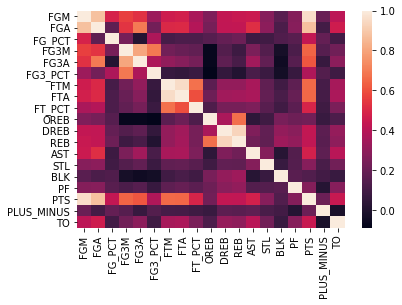

In [106]:
sns.heatmap(corr)

In [115]:
corr_unstack = corr.unstack()
sorted_corr = corr_unstack.sort_values(kind="quicksort")

corr_df = pd.DataFrame(sorted_corr)
corr_df.columns = ['correlation']
print(corr_df[(corr_df['correlation'].abs() > 0.3) & (corr_df['correlation'].abs() < 1)])

                 correlation
TO      REB         0.300479
REB     TO          0.300479
FTM     FG3A        0.307707
FG3A    FTM         0.307707
PF      REB         0.308158
REB     PF          0.308158
DREB    BLK         0.310385
BLK     DREB        0.310385
FTM     REB         0.310457
REB     FTM         0.310457
DREB    FTM         0.310753
FTM     DREB        0.310753
DREB    TO          0.316421
TO      DREB        0.316421
FGM     FG3_PCT     0.332262
FG3_PCT FGM         0.332262
BLK     REB         0.339055
REB     BLK         0.339055
DREB    FTA         0.345744
FTA     DREB        0.345744
FG3A    AST         0.346043
AST     FG3A        0.346043
REB     FTA         0.355730
FTA     REB         0.355730
TO      FTM         0.358811
FTM     TO          0.358811
        AST         0.364483
AST     FTM         0.364483
DREB    OREB        0.367438
OREB    DREB        0.367438
...                      ...
FT_PCT  FTA         0.598683
FTA     FT_PCT      0.598683
PTS     FG3A  

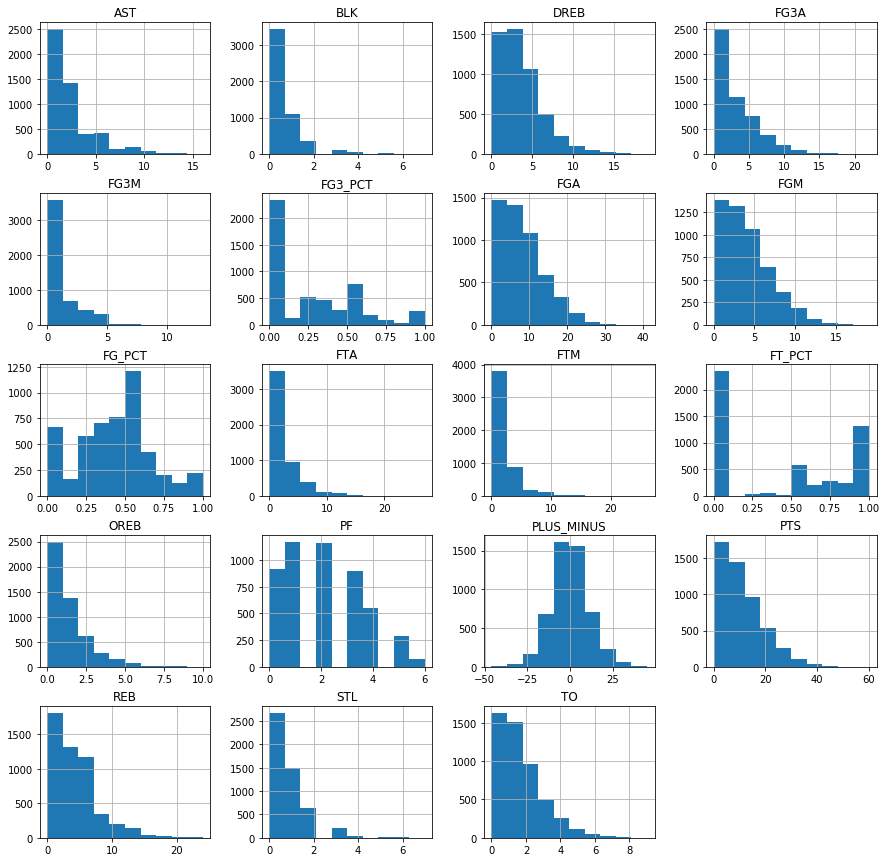

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
stats_sub.hist(ax = ax);

In [121]:
cursor.close()
cnx.close()

In [122]:
int(False)

0